### 2. Multi-Objective Programming



\\begin{equation}
max \ {(10x + y,-8x + 2y)}
\\end{equation}

\\begin{equation}
constraints \   x + y <= 15 
\\end{equation}

\\begin{equation}
\   x - y <= 5 
\\end{equation}

\\begin{equation}
\   x,y >= 0 
\\end{equation}

#### Objective: 
To determine the Pareto frontier for the above multi-goal problem

#### Method: 
- The Pareto frontier is developed as a solution space by weighting the objectives
- The weights are assigned arbitrarily complimenting each other which sum up to 1
- Simple linear programming is used to solve the constrained linear optimization problem

**The objective is defined as:**

\\begin{equation}
f_1(x,y) =  {10x + y}
\\end{equation}

\\begin{equation}
f_2(x,y) =  {-8x + 2y}
\\end{equation}

\\begin{equation}
max \ f(x,y) =  {\alpha f_1(x,y) + \beta f_2(x,y)}
\\end{equation}

\\begin{equation}
subject \ to \   x + y <= 15 
\\end{equation}

\\begin{equation}
\   x - y <= 5 
\\end{equation}

\\begin{equation}
\   x,y >= 0 
\\end{equation}

\\begin{equation}
\   \alpha+\beta=1   
\\end{equation}

#### Implementation: 
To determine the Pareto frontier:

In [ ]:
import numpy as np
from sympy import *
import math
import random
from scipy.optimize import linprog
import pandas as pd

def f1(x,w1):
    return (10*x[0] + y[1])*w1

def f2(x,w2):
    return (-8*x[0] + 2*x[1])*w2


def function(w1,w2):
    x, y=symbols('x y',real=True)
    f1 =  10*x + y
    f2 = -8*x + 2*y
    return -((w1*f1)+(w2*f2))


A = [[1, 1], [1, -1]] # constraint coefficients
b = [15, 5]           # constraint coefficients

c = [-1., -1.5] # objective function coefficients

def linear_optimization(A,b,c):
    x0_bounds = (0., None)
    x1_bounds = (0., None)
    res = linprog(c, A_ub=A, b_ub=b, bounds=(x0_bounds, x1_bounds),options={"disp": True})
    return res.x

In [ ]:
result = pd.DataFrame()
for i in range(10):
    x, y=symbols('x y',real=True)
    w1 = random.uniform(0,1)
    w2 = 1.0 - w1
    c = []
    c.append(function(w1,w2).subs({x:1.,y:0.}))
    c.append(function(w1,w2).subs({x:0.,y:1.}))
    result.loc[i,'alpha'] = w1
    result.loc[i,'beta'] = w2
    
    print linear_optimization(A,b,c)
    
    result.loc[i,'x'] = linear_optimization(A,b,c)[0]
    result.loc[i,'y'] = linear_optimization(A,b,c)[1]

In [ ]:
result['f1'] = result['alpha'] * (10 * result['x'] + result['y'])
result['f2'] = result['beta'] * (-8 * result['x'] + 2*result['y'])
result['f(x,y)'] = result['alpha'] * result['x']  + result['beta'] * result['y']

#### Results:

In [84]:
result

,alpha,beta,x,y,f1,f2,"f(x,y)"
0,0.249748,0.750252,0,15,3.746223,22.507553,11.253777
1,0.218162,0.781838,0,15,3.272430,23.455140,11.727570
2,0.200809,0.799191,0,15,3.012133,23.975734,11.987867
3,0.574845,0.425155,10,5,60.358692,-29.760872,7.874223
4,0.863910,0.136090,10,5,90.710556,-9.526296,9.319550
5,0.366507,0.633493,0,15,5.497612,19.004777,9.502388
6,0.085135,0.914865,0,15,1.277023,27.445954,13.722977
7,0.289157,0.710843,0,15,4.337359,21.325283,10.662641
8,0.051592,0.948408,0,15,0.773884,28.452232,14.226116
9,0.991290,0.008710,10,5,104.085499,-0.609668,9.956452


#### Plot - f1 and f2:

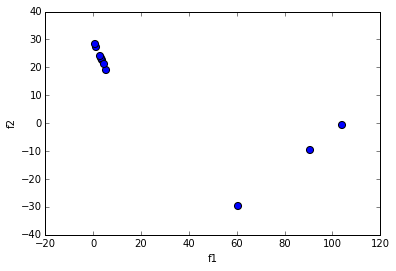

In [107]:
import matplotlib.pyplot as plt
import matplotlib.pyplot
import pylab
%matplotlib inline
result.plot(kind='scatter', x='f1', y='f2',s=50)

### Concluding remarks:

- The frontier has two optimal solutions **[0,15]** and **[10,5]**
- The frontier has not many listed points which could be called as optimal.
- The competeting objectives vary with the weights as shown above in the table
- Lower alphas tend to gravitate towards **[0,15]** while lower betas tend to **[10,5]**